# Problem Set 2: Classical Dynamics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Part A: Diatomic Molecules
### A1: The Lennard-Jones Potential
#### a)

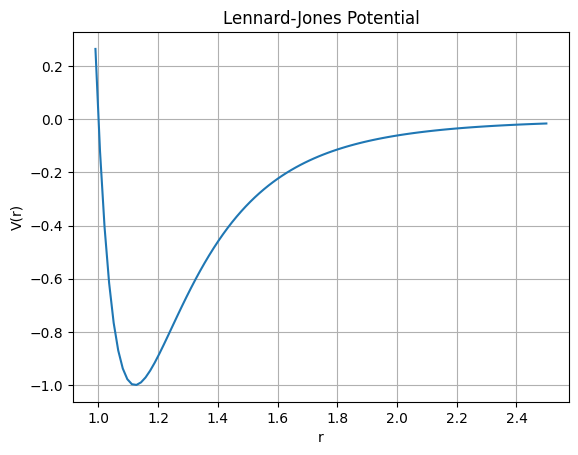

In [3]:
epsilon = 1
sigma = 1

x1 = np.linspace(0.99, 2.5, 100)
def lj_potential(r, epsilon = 1.0, sigma = 1.0):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

potential = lj_potential(x1)
plt.plot(x1, potential); plt.xlabel('r'); plt.ylabel("V(r)"); plt.title("Lennard-Jones Potential"); plt.grid(); plt.show()

#### b)

![Alt text](Pset02.png)

#### c)

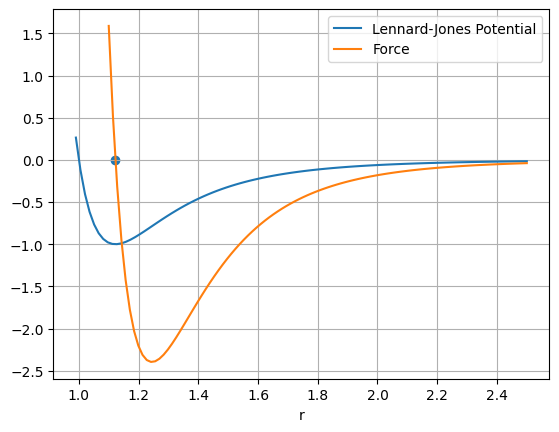

In [4]:
def lj_force(r, epsilon = 1.0, sigma = 1.0):
    return 24*epsilon*( (2*((sigma/r)**12)) - ((sigma/r)**6))*(1/r)

epsilon = 1.0
sigma = 1.0

x2 = np.linspace(1.1, 2.5, 100)
Force = lj_force(x2)

#x1 and potential are from the last question
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.plot(x2, Force, label="Force")
plt.scatter(1.1225,0)
plt.xlabel('r');plt.legend();plt.grid();plt.show()

#### d)
The atoms will seperate from one another intially if we start them at r = 1 until they reach the bottom of the well. The sign of the force between them at this point is negative. This is not consistent with my first statement because a negative force will act to bring the atoms closer together.

### A2: Dynamics
#### a)

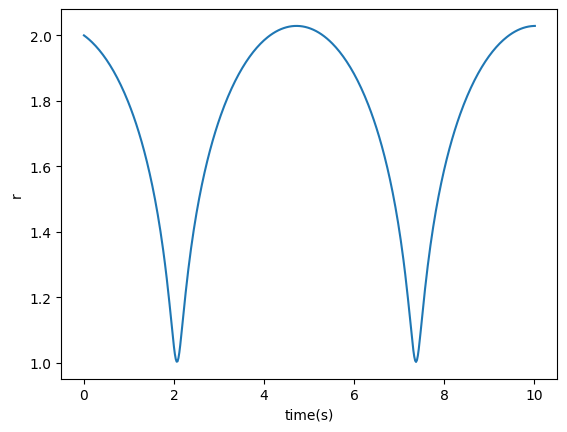

In [5]:
def lj_1D_force(r, sigma=1.0, epsilon=1.0):
    return 24*epsilon*( (2*((sigma/r[-1])**12)) - ((sigma/r[-1])**6))*(1/r[-1])
    
def velocity_verlet(r0, v0, h, m, end_t):
    r = [r0]
    v = [v0]
    t = [0]
    while t[-1] < end_t:
        # step 1: calculate
        F = lj_1D_force(r)
        r.append(r[-1] + (h*v[-1]) + ((h**2)*(F/(2*m))))
        #step 2: evaluate
        F_new = lj_1D_force(r)
        # step 3: calculate
        v.append(v[-1] + ((h/(2*m))*(F + F_new)))
        t.append(t[-1] + h)
    return t, r, v

r0 = 2.0
v0 = -0.1
h = 0.02
end_t = 10.0
m = 1
t, r, v = velocity_verlet(r0, v0, h, m, end_t)
plt.plot(t, r);plt.xlabel("time(s)");plt.ylabel("r");plt.show()

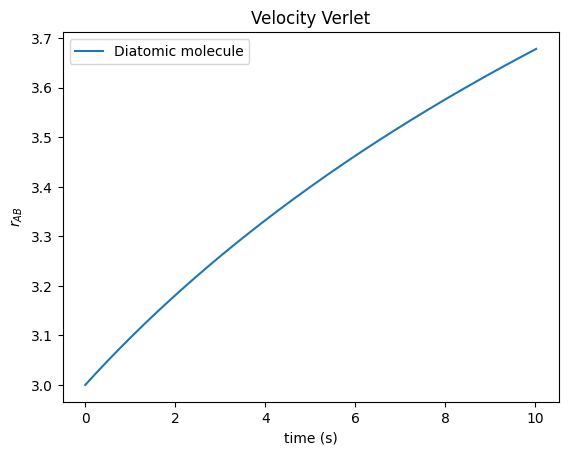

In [6]:
def bond_lengths(pos):
    r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    for i in range(len(pos)):
        for j in range(len(pos)):
            xij = pos[i][0][-1] - pos[j][0][-1]
            yij = pos[i][1][-1] - pos[j][1][-1]
            zij = pos[i][2][-1] - pos[j][2][-1]
            r[i][j] = np.sqrt(xij**2 + yij**2 + zij**2)
    return r    

def lj_3d(particle_index, pos, r, sigma=1.0, epsilon=1.0):
    #The force vector containing all 3D forces acting on a specified particle.
    f = [0, 0, 0]
    for i in range(len(pos)):
        if i != particle_index:
            f[0] += -(0.5)*(pos[particle_index][0][-1] - pos[i][0][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
            f[1] += -(0.5)*(pos[particle_index][1][-1] - pos[i][1][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
            f[2] += -(0.5)*(pos[particle_index][2][-1] - pos[i][2][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6)) 
    return f

def multiple_atoms_Verlet(pos, vel, h, end_time, m):
    t = [0]
    while t[-1] < end_time:
        F = [[0 for _ in range(3)] for _ in range(len(pos))]
        F_new = [[0 for _ in range(3)] for _ in range(len(pos))]
        #Compute all of our r_ij b/c we need them for computing F
        
        r = bond_lengths(pos)
        for i in range(len(pos)):
            F[i] = lj_3d(i, pos, r)
        
        for i in range(len(pos)):
            # step 1: calculate
            pos[i][0].append(pos[i][0][-1] + (h*vel[i][0][-1]) + (((h**2)*F[i][0])/(2*m[i]))) # xi(k+1)
            pos[i][1].append(pos[i][1][-1] + (h*vel[i][1][-1]) + (((h**2)*F[i][1])/(2*m[i]))) # yi(k+1)
            pos[i][2].append(pos[i][2][-1] + (h*vel[i][2][-1]) + (((h**2)*F[i][2])/(2*m[i]))) # zi(k+1)

        # step 2: evaluate  
        # Because we have computed new positions for each particle, we must re-compute our new bond lengths.
        r = bond_lengths(pos)
        for i in range(len(pos)):
            F_new[i] = lj_3d(i, pos, r)
            
        # step 3: calculate
        for i in range(len(pos)):
            vel[i][0].append(vel[i][0][-1] + ((h/(2*m[i])) * (F[i][0] + F_new[i][0])))
            vel[i][1].append(vel[i][1][-1] + ((h/(2*m[i])) * (F[i][1] + F_new[i][1])))
            vel[i][2].append(vel[i][2][-1] + ((h/(2*m[i])) * (F[i][2] + F_new[i][2])))
        t.append(t[-1] + h)
    return t, pos, vel

# def multiple_atoms_Verlet(pos, vel, h, end_time, m):
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B]
A_v = [[-0.1], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
vel = [A_v, B_v]
h = 0.02
m = [1, 1]
end_time = 10
t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

# Converting lists into arrays to make math easier.
A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((A - B)**2)
# print(len(r_AB[1]))
# print(r_AB[0])
plt.plot(t, r_AB[0], label="Diatomic molecule");plt.xlabel("time (s)");plt.ylabel("$r_{AB}$");plt.legend();plt.title("Velocity Verlet")
plt.show()

# #The second plot is here to confirm that our system is aligning with the potential.
# energy_at_end = lj_potential(r_AB[0][-1])
# energy_at_start = lj_potential(r_AB[0][0])
# #energy_middle = lj_potential(r_AB[0][n]) for _ in range(len(r_AB))]
# zeroes_list = [0 for _ in range(len(r_AB[0]))]
# plt.scatter(r_AB[0][-1], energy_at_end, label = "end")
# plt.scatter(r_AB[0][0], energy_at_start, label = "start")
# plt.scatter(r_AB[0], zeroes_list)
# plt.plot(x1, potential, label="Lennard-Jones Potential") 
# plt.xlabel('r');plt.legend();plt.grid()
# plt.show()

#### b)

The curve is sharper for the small radius because the absolute value of the potential's derivative is greater on the left side of the potential than on the right.

## A3: Conservation of Energy
#### a)

RMSD with time step 0.02 : 0.27848212321929244


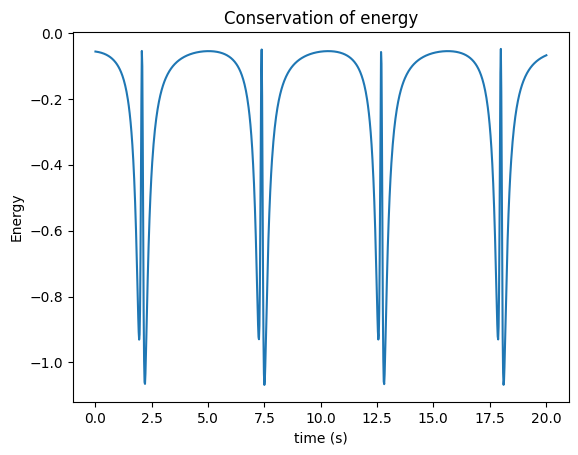

In [10]:
def energy_of_system(t, m, v, r_AB, epsilon = 1.0, sigma = 1.0):
    energy = list()
    for i in range(0, len(t)):
        energy_new = ((1/2)*m[0]*(v[0][0][i]**2)) - ((1/2)*m[1]*(v[1][0][i]**2)) + (4*epsilon*((sigma/r_AB[0][i])**12 - (sigma/r_AB[0][i])**6))
        energy.append(energy_new)    
    return energy

def rms_energy(energy):
    summation_error = 0
    for i in range(len(energy)):
        summation_error += (energy[i] - energy[0])**2

    return np.sqrt(summation_error/len(energy))

A = [[2.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]]
pos = [A, B]
A_v = [[-0.1], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v]
h = 0.02
m = [1, 1]
end_time = 20
t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((A - B)**2)

energy = energy_of_system(t, m, vel, r_AB)
rmsd = rms_energy(energy) # root mean square deviation
print("RMSD with time step",h,":", rmsd)
plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

# kinetic_diff = (0.5*(vel[0][0]**2)) + (0.5*(vel[1][0]**2))#difference in velocities for both atoms
# plt.plot(t, kinetic_diff, label="Kinetic total")
# plt.plot(t, 0.5*(vel[0][0]**2), label="K_A")
# listed = vel[0][0]**2
# plt.plot(t, 0.5*(vel[1][0]**2), label="K_B")
# plt.xlabel("time(s)");plt.ylabel("Kinetic energy");plt.legend();plt.show()

In [13]:
def energy_of_system(t, m, v, r_AB, epsilon = 1.0, sigma = 1.0):
    energy = list()
    for i in range(0, len(t)):
        energy_new = ((1/2)*(m[0]/2)*(v[i]**2)) - ((1/2)*(m[1]/2)*(v[i]**2)) + (4*epsilon*((sigma/r_AB[i])**12 - (sigma/r_AB[i])**6))
        energy.append(energy_new)    
    return energy

def rms_energy(energy):
    summation_error = 0
    for i in range(len(energy)):
        summation_error += (energy[i] - energy[0])**2

    return np.sqrt(summation_error/len(energy))

energy = energy_of_system(t, m, v, r)
rms_energy()
plt.plot(t, energy)
plt.show()

IndexError: list index out of range

The error is the largest when the atoms are close together (small $r_{AB}$). 
#####
Recall the derivation of the Verlet algorithm with 
Taylor expansions. When is the neglected higher order term largest?

#### b)

RMSD with time step 0.02 : 0.27865968178669


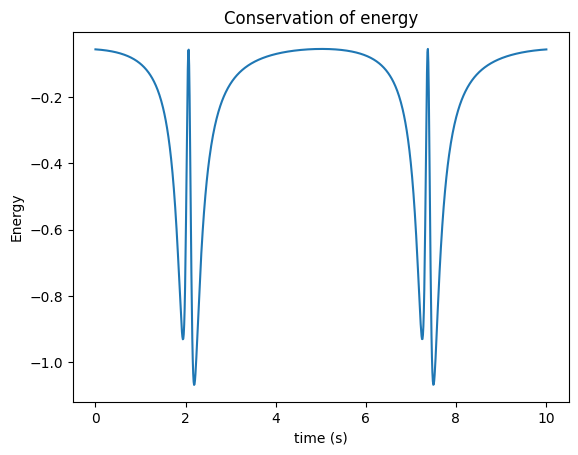

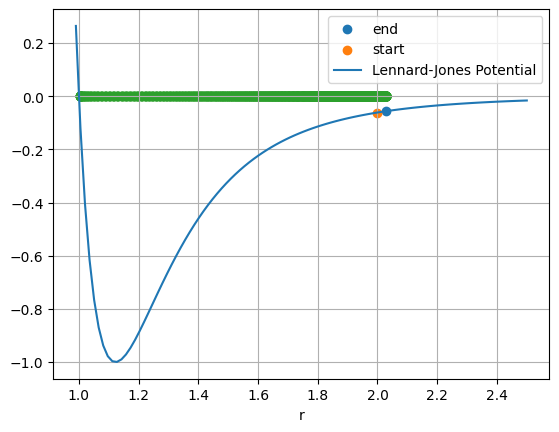

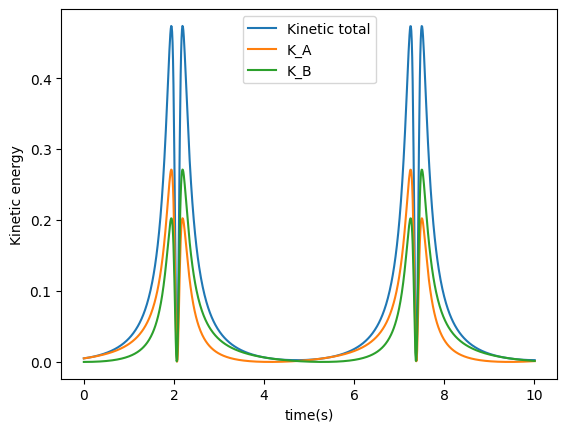

In [267]:
A = [[2.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
pos = [A, B]
A_v = [[-0.1], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
vel = [A_v, B_v]
h_small = 0.01
m = [1, 1]
end_time = 10
t, pos, vel = multiple_atoms_Verlet(pos, vel, h_small, end_time, m)
A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((B - A)**2)

energy = energy_of_system(t, m, vel, r_AB)
rmsd = rms_energy(energy) # root mean square deviation
print("RMSD with time step",h,":", rmsd)
plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show()

#The second plot is here to confirm that our system is aligning with the potential.
energy_at_end = lj_potential(r_AB[0][-1])
energy_at_start = lj_potential(r_AB[0][0])
#energy_middle = lj_potential(r_AB[0][n]) for _ in range(len(r_AB))]
zeroes_list = [0 for _ in range(len(r_AB[0]))]
plt.scatter(r_AB[0][-1], energy_at_end, label = "end")
plt.scatter(r_AB[0][0], energy_at_start, label = "start")
#plt.scatter(r_AB[0], energy_middle)
plt.scatter(r_AB[0], zeroes_list)
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.xlabel('r');plt.legend();plt.grid()
plt.show()

kinetic_diff = (0.5*(vel[0][0]**2)) + (0.5*(vel[1][0]**2))#difference in velocities for both atoms
plt.plot(t, kinetic_diff, label="Kinetic total")
plt.plot(t, 0.5*(vel[0][0]**2), label="K_A")
plt.plot(t, 0.5*(vel[1][0]**2), label="K_B")
plt.xlabel("time(s)");plt.ylabel("Kinetic energy");plt.legend();plt.show()

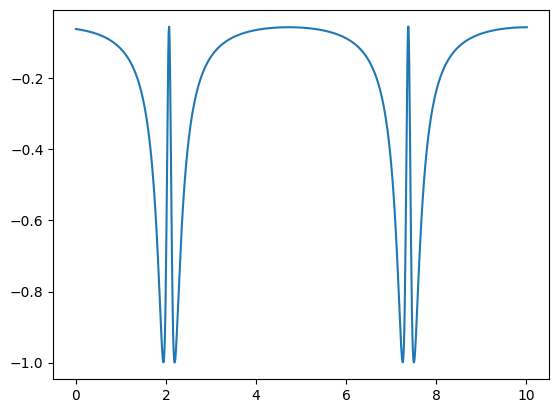

In [325]:
r0 = 2.0
v0 = -0.1
h = 0.01
end_t = 10.0
m = 1
t, r, v = velocity_verlet(r0, v0, h, m, end_t)

energy = energy_of_system(t, m, v, r)
plt.plot(t, energy)
plt.show()

As the step size decreases, so does the error in our energy. We cam say that our algorithm is "recovering accuracy" faster.
#### c)

RMSD with time step 0.02 : 0.2883847080356147


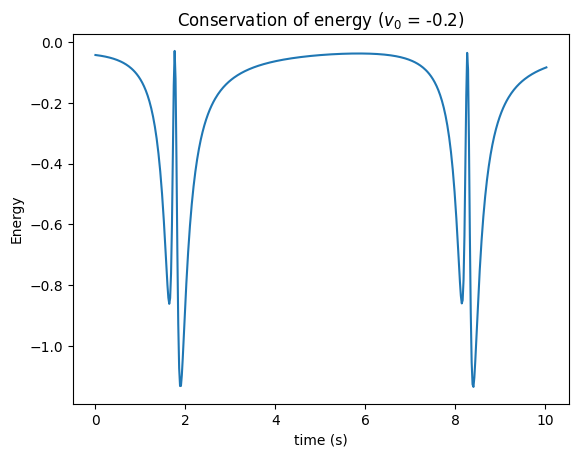

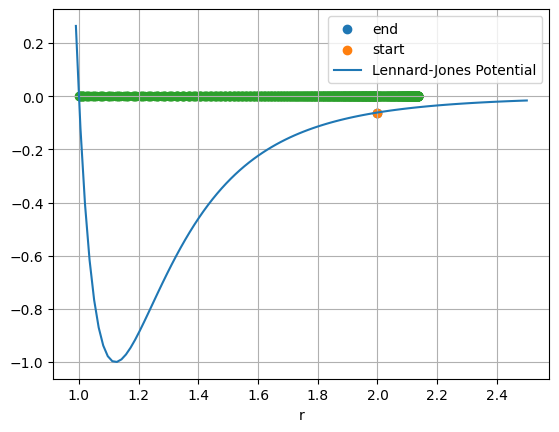

In [269]:
A = [[2.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
pos = [A, B]
A_v = [[-0.2], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
vel = [A_v, B_v]
h = 0.02
m = [1, 1]
end_time = 10
t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)
A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((B - A)**2)

energy = energy_of_system(t, m, vel, r_AB)
rmsd = rms_energy(energy) # root mean square deviation
print("RMSD with time step",h,":", rmsd)
plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy ($v_{0}$ = -0.2)");
plt.show()

#The second plot is here to confirm that our system is aligning with the potential.
energy_at_end = lj_potential(r_AB[0][-1])
energy_at_start = lj_potential(r_AB[0][0])
#energy_middle = lj_potential(r_AB[0][n]) for _ in range(len(r_AB))]
zeroes_list = [0 for _ in range(len(r_AB[0]))]
plt.scatter(r_AB[0][-1], energy_at_end, label = "end")
plt.scatter(r_AB[0][0], energy_at_start, label = "start")
#plt.scatter(r_AB[0], energy_middle)
plt.scatter(r_AB[0], zeroes_list)
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.xlabel('r');plt.legend();plt.grid()
plt.show()

# kinetic_diff = (0.5*(vel[0][0]**2)) + (0.5*(vel[1][0]**2))#difference in velocities for both atoms
# plt.plot(t, kinetic_diff, label="Kinetic total")
# plt.plot(t, 0.5*(vel[0][0]**2), label="K_A")
# plt.plot(t, 0.5*(vel[1][0]**2), label="K_B")
# plt.xlabel("time(s)");plt.ylabel("Kinetic energy");plt.legend();plt.show()

RMSD with time step 0.02 : 0.1718456550230987


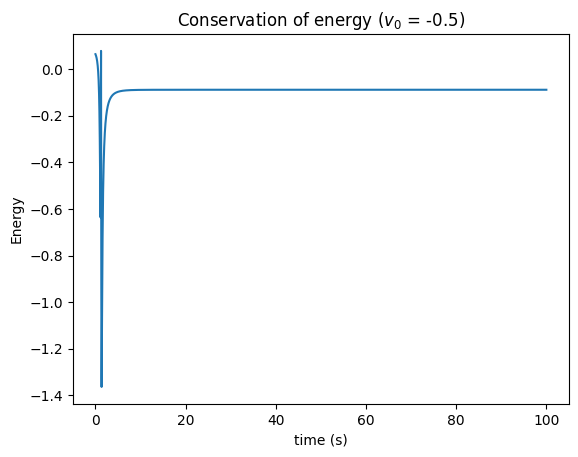

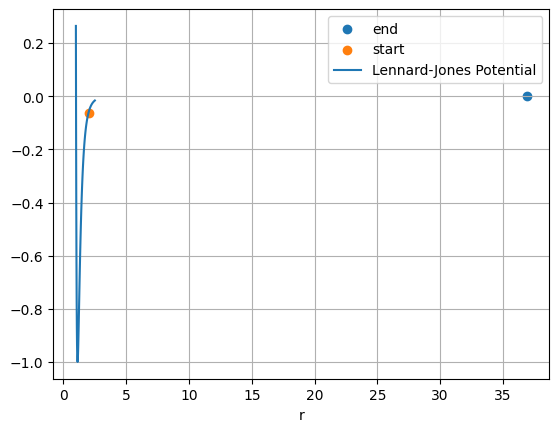

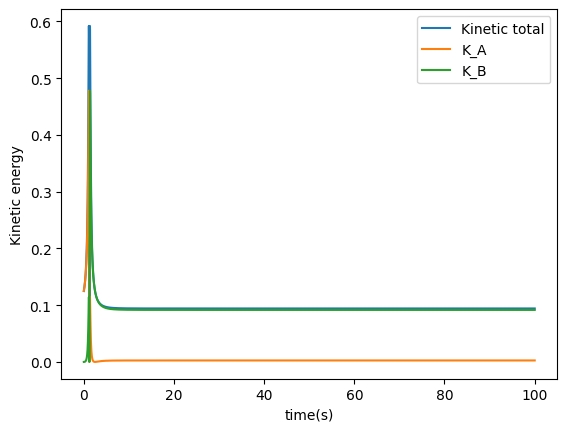

In [278]:
A = [[2.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
pos = [A, B]
A_v = [[-0.5], [0.0], [0.0]]
B_v = [[-0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
vel = [A_v, B_v]
h = 0.02
m = [1, 1]
end_time = 100
t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)
A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((B - A)**2)


energy = energy_of_system(t, m, vel, r_AB)
rmsd = rms_energy(energy) # root mean square deviation
print("RMSD with time step",h,":", rmsd)
plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy ($v_{0}$ = -0.5)");plt.show()

#The second plot is here to confirm that our system is aligning with the potential.
energy_at_end = lj_potential(r_AB[0][-1])
energy_at_start = lj_potential(r_AB[0][0])
zeroes_list = [0 for _ in range(len(r_AB[0]))]
plt.scatter(r_AB[0][-1], energy_at_end, label = "end")
plt.scatter(r_AB[0][0], energy_at_start, label = "start")
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.xlabel('r');plt.legend();plt.grid()
plt.show()

kinetic_diff = (0.5*(vel[0][0]**2)) + (0.5*(vel[1][0]**2))#difference in velocities for both atoms
plt.plot(t, kinetic_diff, label="Kinetic total")
plt.plot(t, 0.5*(vel[0][0]**2), label="K_A")
plt.plot(t, 0.5*(vel[1][0]**2), label="K_B")
plt.xlabel("time(s)");plt.ylabel("Kinetic energy");plt.legend();plt.show()

### A4: Bonus

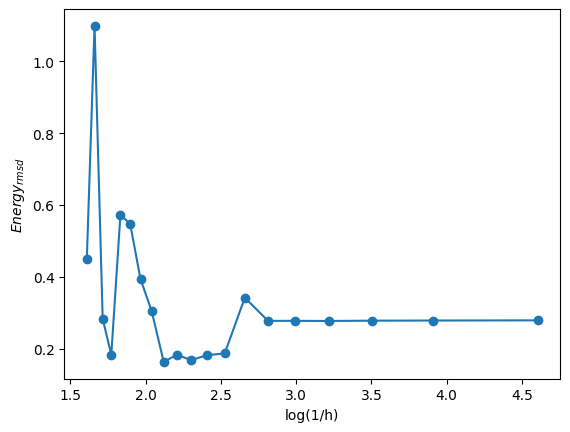

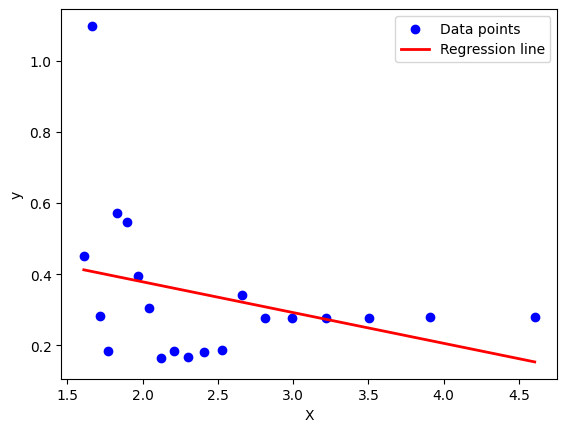

In [274]:
r0 = 2 
v0 = -0.5
h = 0.01
m = 1
end_time = 10
rmsd_energy = []
h_list = [round(0.01*x+0.01,2) for x in range(20)]
for h in h_list: # 10 rms energies errors will be calculated from different h values.
    A = [[2.0], [0.0], [0.0]] 
    B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
    pos = [A, B]
    A_v = [[-0.1], [0.0], [0.0]]
    B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
    vel = [A_v, B_v]
    m = [1, 1]
    end_time = 10
    t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)
    A = np.array(pos[0])
    B = np.array(pos[1])
    vel = np.array(vel)
    r_AB = np.sqrt((B - A)**2)
    energy = energy_of_system(t, m, vel, r_AB)
    rmsd = rms_energy(energy) # root mean square deviation
    rmsd_energy.append(rmsd)    

h_list_inverse_log = [np.log(1/x) for x in h_list]
plt.plot(h_list_inverse_log, rmsd_energy);plt.scatter(h_list_inverse_log, rmsd_energy);plt.xlabel("log(1/h)");plt.ylabel("$Energy_{rmsd}$")
plt.show()
# linear regression model
H = np.array(h_list_inverse_log)
E = np.array(rmsd_energy)
H = H.reshape(-1, 1)
model = LinearRegression()
model.fit(H, E)
# Create a range of values for plotting the regression line
H_plot = np.linspace(H.min(), H.max(), 100).reshape(-1, 1)

# Predict y values for the plotting range
E_plot = model.predict(H_plot)

# Plot the original data points
plt.scatter(H, E, color='blue', label='Data points')
# Plot the regression line
plt.plot(H_plot, E_plot, color='red', linewidth=2, label='Regression line')
# Label the axes
plt.xlabel('X');plt.ylabel('y');plt.legend();
plt.show()

#### When  you increase the energy of the system, the bond breaks. This is why we see the bond length increase linearly.
## Part B: Triatomic reaction dynamics with Lennard-Jones potentials
### B1: The Lennard-Jones potential
#### a)

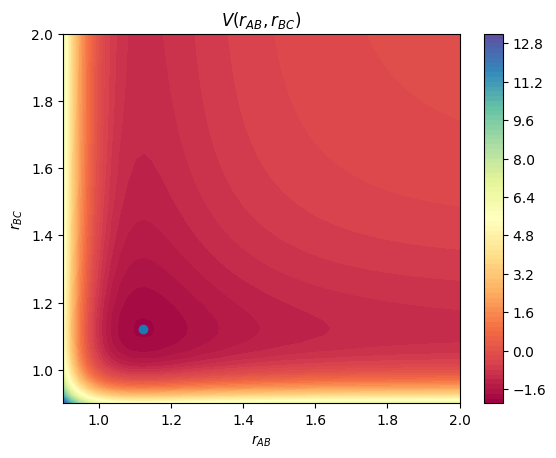

In [234]:
r_AB = np.linspace(0.9,2.0)
r_BC = np.linspace(0.9,2.0)

def V(r, epsilon=1, sigma=1):
    potential = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return potential


rAB, rBC,= np.meshgrid(r_AB, r_BC)
    
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)

plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
r_min = 2**(1/6)
plt.scatter(r_min,r_min)

plt.title('$V(r_{AB}, r_{BC})$')
plt.xlabel('$r_{AB}$')
plt.ylabel('$r_{BC}$')
plt.show()

##### The configuration of the atoms that gives the minimum potential would be when r_AB = r_BC = 2**(1/6).
#### b)

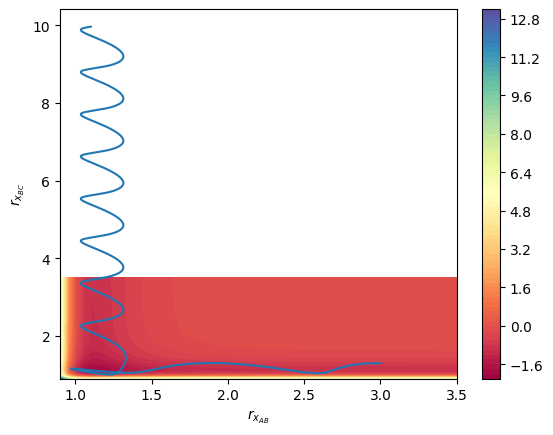

In [275]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[1.0], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.02 # homework step size diverges ?
m = [1, 1, 1]
end_time = 11

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

##### These starting conditions are preparation for simulating what happens when particle with an intial velocity interacts with a pair of bonded particles in a 1-dimensional plane.

#### c)

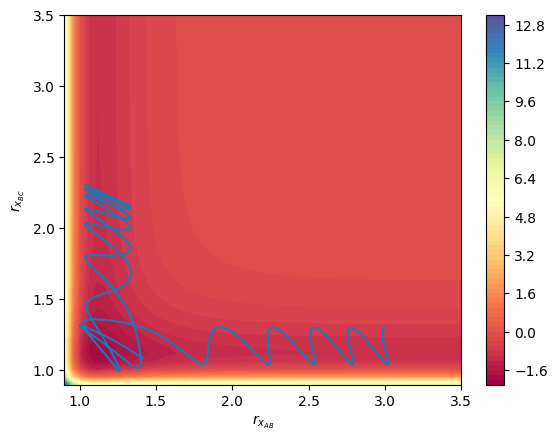

In [276]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[0.2], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.02
m = [1, 1, 1]
end_time = 15

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

#### d)

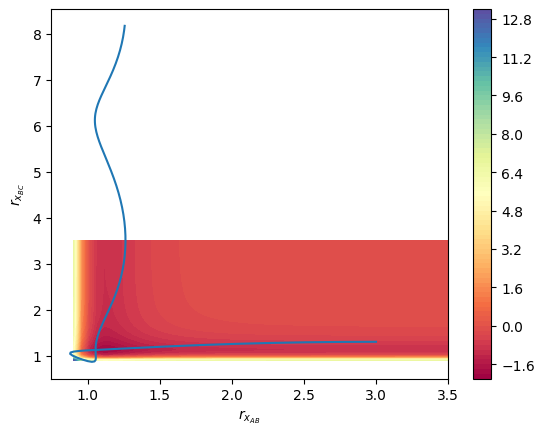

In [277]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[5.0], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.01
m = [1, 1, 1]
end_time = 2

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

With a time step of h = 0.01, the simulations look better for me. Why is this?